Import Required Libraries

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("/content/Bank_customers_data.csv")

In [3]:
data.head()

,Unnamed: 0,Customer ID,Name,Surname,Gender,Age,Region,Job Classification,Date Joined,Balance,loan,score,loan_eligibility
0,0,100000001,Simon,Walsh,Male,21,England,White Collar,05.Jan.15,113810.15,5252.0,644.0,2276203.00
1,1,400000002,Jasmine,Miller,Female,34,Northern Ireland,Blue Collar,06.Jan.15,36919.73,8907.0,697.0,0.00
2,2,100000003,Liam,Brown,Male,46,England,White Collar,07.Jan.15,101536.83,2162.0,617.0,2030736.60
3,3,300000004,Trevor,Parr,Male,32,Wales,White Collar,08.Jan.15,1421.52,7277.0,672.0,0.00
4,4,100000005,Deirdre,Pullman,Female,38,England,Blue Collar,09.Jan.15,35639.79,2586.0,405.0,178198.95


EDA


alredy we did all pre processing in task one so direct we do encoding

In [4]:
from sklearn.preprocessing import OrdinalEncoder

In [6]:
!pip install feature-engine -q

In [7]:
import feature_engine

In [8]:
from feature_engine.outliers import Winsorizer

In [9]:
Winsor=Winsorizer(capping_method='quantiles',tail='both',variables=['Customer ID', 'Age', 'Balance', 'loan', 'score','loan_eligibility'])
Winsor.fit(data)

Winsorizer(capping_method='quantiles', fold=0.05, tail='both',
           variables=['Customer ID', 'Age', 'Balance', 'loan', 'score',
                      'loan_eligibility'])

In [10]:
cleaned_data=Winsor.transform(data)

In [14]:
cleaned_data

,Unnamed: 0,Customer ID,Name,Surname,Gender,Age,Region,Job Classification,Date Joined,Balance,loan,score,loan_eligibility
0,0,-0.786112,Simon,Walsh,1.0,-1.793776,0.0,2.0,40.0,2.480047,-0.118453,644.0,5.618638
1,1,2.598261,Jasmine,Miller,0.0,-0.469664,1.0,0.0,50.0,-0.095349,1.296942,680.0,-0.571305
2,2,-0.786112,Liam,Brown,1.0,0.752594,0.0,2.0,60.0,2.068960,-1.315052,617.0,4.951112
3,3,1.470137,Trevor,Parr,1.0,-0.673373,3.0,2.0,71.0,-1.284339,0.665726,672.0,-0.571305
4,4,-0.786112,Deirdre,Pullman,0.0,-0.062245,0.0,0.0,81.0,-0.138220,-1.150859,405.0,-0.086708
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4009,4009,0.342057,Sam,Lewis,1.0,2.585980,2.0,1.0,293.0,-0.671722,1.703553,586.0,-0.571305
4010,4010,0.342057,Keith,Hughes,1.0,1.363723,2.0,0.0,293.0,0.546068,0.442671,322.0,-0.571305
4011,4011,0.342057,Hannah,Springer,0.0,1.160013,2.0,1.0,293.0,0.660220,0.810170,680.0,-0.571305
4012,4012,0.342057,Christian,Reid,1.0,1.261868,2.0,0.0,293.0,-1.323932,-0.339185,369.0,-0.571305


In [17]:
X = cleaned_data[['Balance','loan', 'score', 'loan_eligibility']]

In [18]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [19]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  self.max_iter = max_iter
Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x7fc7085b3be0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 1014, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 1184, in _make_controller_from_path
    lib_controller = controller_class(
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 113, in __init__
    self.dynlib = ctypes.CDLL(filepath, mode=_RTLD_NOLOAD)
  File "/usr/lib/python3.10/ctypes/__init__.py", line 374, in __init__
    self._handle = _dlopen(self.

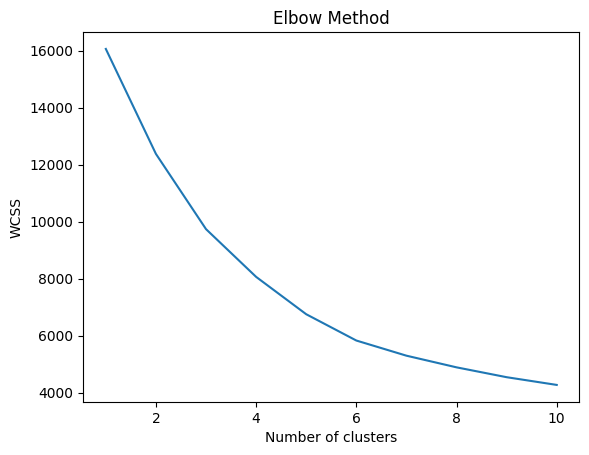

In [20]:
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [21]:
n_clusters = 2

In [22]:
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
kmeans.fit(X_scaled)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  self.max_iter = max_iter


KMeans(n_clusters=2, random_state=42)

In [24]:
cleaned_data['Cluster'] = kmeans.labels_

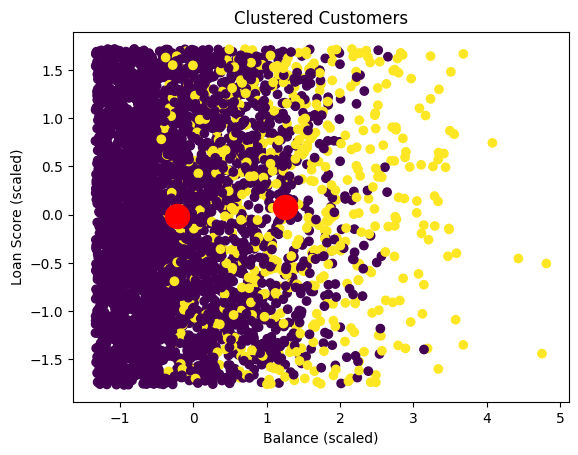

In [25]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.title('Clustered Customers')
plt.xlabel('Balance (scaled)')
plt.ylabel('Loan Score (scaled)')
plt.show()

In [27]:
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_df = pd.DataFrame(cluster_centers, columns=['Balance', 'loan', 'score', 'loan_eligibility'])
cluster_df['Cluster'] = range(n_clusters)
print(cluster_df)

    Balance      loan       score  loan_eligibility  Cluster
0 -0.225841 -0.013997  488.026176         -0.317613        0
1  1.250588  0.077507  573.394137          1.758768        1


In [29]:
high_priority_customers = cleaned_data[cleaned_data['Cluster'] == 1]
low_priority_customers = cleaned_data[cleaned_data['Cluster'] == 0]

In [30]:
print("High Priority Customers:")
print(high_priority_customers)



High Priority Customers:
      Unnamed: 0  Customer ID      Name  Surname  Gender       Age  Region  \
0              0    -0.786112     Simon    Walsh     1.0 -1.793776     0.0   
2              2    -0.786112      Liam    Brown     1.0  0.752594     0.0   
5              5     1.470137       Ava  Coleman     0.0 -0.877083     3.0   
34            34    -0.786112     Karen     Dyer     0.0 -0.469664     0.0   
42            42     0.342013      Jake   Morgan     1.0  1.058158     2.0   
...          ...          ...       ...      ...     ...       ...     ...   
3984        3984    -0.786067   Dominic      May     1.0 -0.062245     0.0   
3990        3990    -0.786067       Sue  Cornish     0.0 -0.877083     0.0   
3993        3993    -0.786067   Rebecca    Poole     0.0  0.243320     0.0   
4002        4002    -0.786067      Paul    Avery     1.0  0.752594     0.0   
4005        4005    -0.786067  Kimberly     Gray     0.0  0.548884     0.0   

      Job Classification  Date Joined 

In [31]:
print("\nLow Priority Customers:")
print(low_priority_customers)


Low Priority Customers:
      Unnamed: 0  Customer ID       Name   Surname  Gender       Age  Region  \
1              1     2.598261    Jasmine    Miller     0.0 -0.469664     1.0   
3              3     1.470137     Trevor      Parr     1.0 -0.673373     3.0   
4              4    -0.786112    Deirdre   Pullman     0.0 -0.062245     0.0   
6              6    -0.786112    Dorothy   Thomson     0.0 -0.469664     0.0   
7              7     0.342012       Lisa      Knox     0.0  0.956303     2.0   
...          ...          ...        ...       ...     ...       ...     ...   
4009        4009     0.342057        Sam     Lewis     1.0  2.585980     2.0   
4010        4010     0.342057      Keith    Hughes     1.0  1.363723     2.0   
4011        4011     0.342057     Hannah  Springer     0.0  1.160013     2.0   
4012        4012     0.342057  Christian      Reid     1.0  1.261868     2.0   
4013        4013     1.470182    Stephen       May     1.0 -0.571519     3.0   

      Job Clas